### Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data and show

In [59]:
df = pd.read_csv('height-weight.csv')
df.head(2)

,Weight,Height
0,45,120
1,58,135


### check null values

In [60]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

### check info

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


### check statistical information

In [62]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


### check correlation

In [63]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


### VISULAIZATIONS (Scatter Plot)

<Axes: xlabel='Height', ylabel='Weight'>

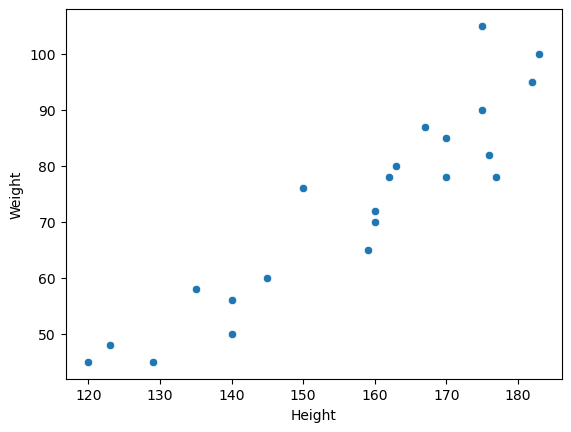

In [64]:
sns.scatterplot(x='Height',y='Weight',data=df)

### Pair plot

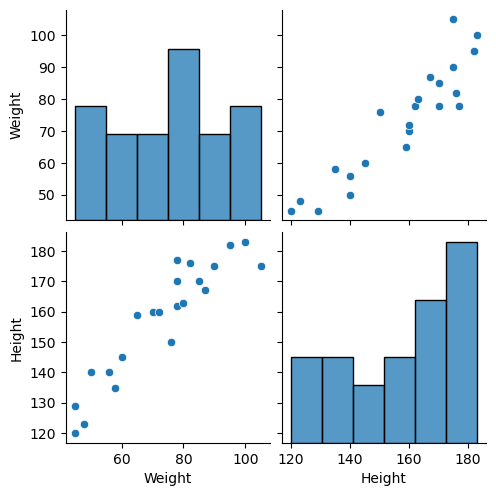

In [65]:
sns.pairplot(df)

<Axes: ylabel='Height'>

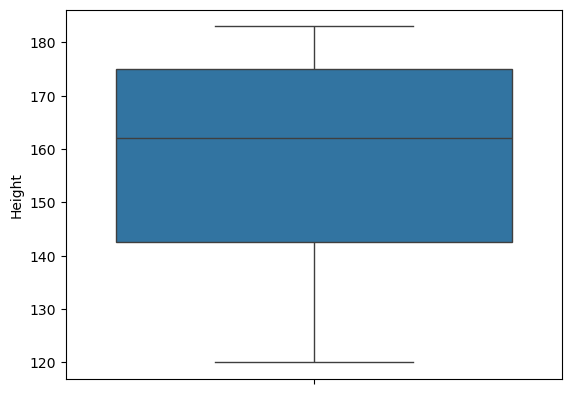

In [66]:
sns.boxplot(df['Height'])

#### separate the input and output features

In [67]:
x=df[['Height']]
y=df['Weight']

### train test split and make lr object

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [70]:
x_train.mean(),x_train.std()

(-2.1587669923266933e-17, 1.0)

In [71]:
lr = LinearRegression(n_jobs=-1)

In [72]:
lr.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [73]:
pred=lr.predict(x_test)
pred

array([92.36074777, 85.86942521, 39.50283548, 96.99740674, 75.66877547])

### Show regression line


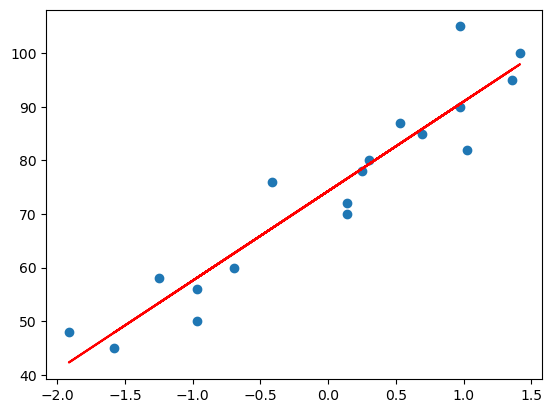

In [74]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='red')

### Performance Metrics

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score:',r2_score(y_test,pred))

MAE: 8.078703941181502
MSE: 83.23803021031195
RMSE: 9.123487831433325
R2 Score: 0.6981504561563971


### Coefficients of lr model 




In [76]:
print('Coefficient:',lr.coef_)
print('Intercept:',lr.intercept_)

Coefficient: [16.71556824]
Intercept: 74.27777777777777


In [77]:
x_train=pd.DataFrame(x_train,columns=['Height'])
x_test=pd.DataFrame(x_test,columns=['Height'])

In [78]:
x_train.describe()

,Height
count,1.800000e+01
mean,-2.158767e-17
std,1.028992e+00
min,-1.913961e+00
25%,-9.015034e-01
50%,1.941700e-01
75%,9.015034e-01
max,1.414667e+00
